<a href="https://www.kaggle.com/code/megr25/breast-cancer-interpretation-knn-and-logreg?scriptVersionId=114394364" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**KNN and Logistica Regression**
1. In this Kernel I am using a  breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. To predict benign or malignant Cancer
2. I am using OSEMN methodology (Obtain, Scrub, Explore, Model, iNterpret) to standardized my data analysis process
3. I am using KNN and Logistical Regression to predict benign or malignant Cancer
4. Any feedback it is more than welcome

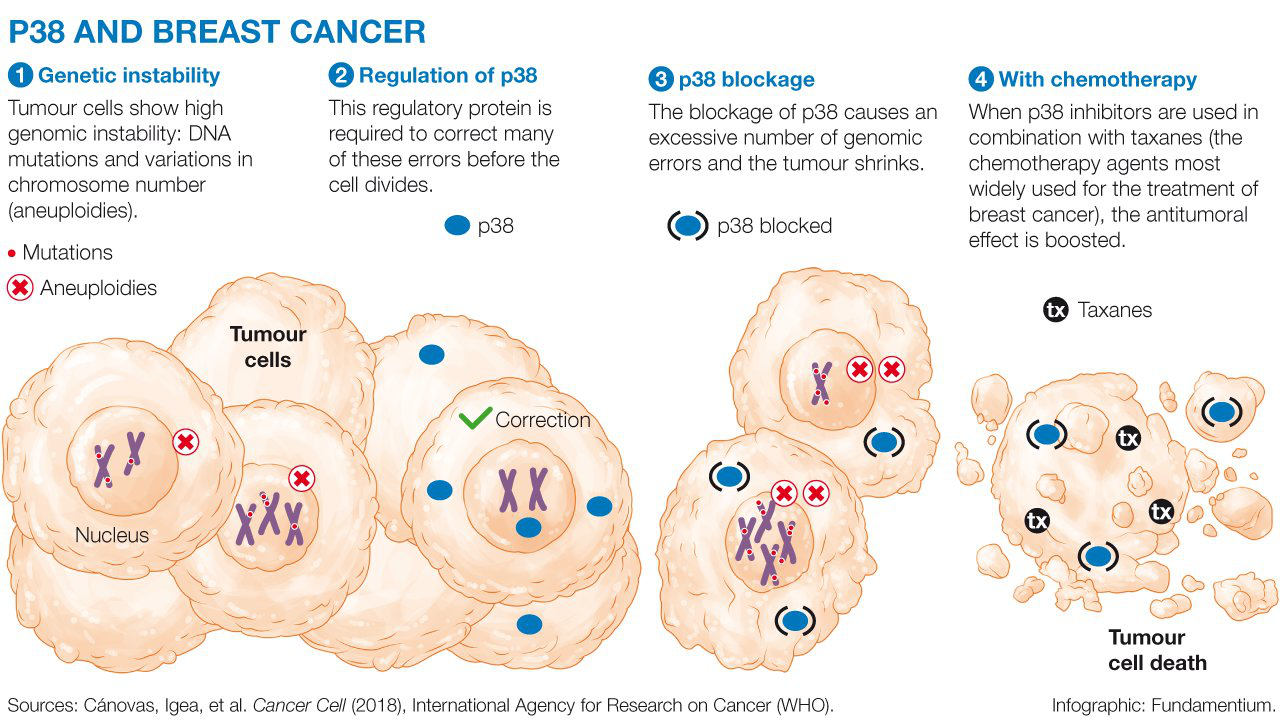

In [1]:
from IPython.display import display
from PIL import Image
path="../input/breast-cancerjpg/breast cancer.jpg"
display(Image.open(path))

In [2]:
#Basic library 
import pandas  as pd 
import numpy as np 
import math 
import re 

#visualization 
import seaborn as sns 
import matplotlib.pyplot as plt 
import cufflinks as cf
%matplotlib inline
cf.go_offline()
sns.set_style('whitegrid')



# Data Science OSEMN 
**Obtaining Our Data**

In [3]:
#importing Data
Data = '../input/breast-cancer/Breast_cancer.csv'
df = pd.read_csv(Data)
df.drop('Unnamed: 0', axis = 1 , inplace = True)
df.tail(5)

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1
698,897471,4,8,8,5,4,5.0,10,4,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               699 non-null    int64  
 1   Cl.thickness     699 non-null    int64  
 2   Cell.size        699 non-null    int64  
 3   Cell.shape       699 non-null    int64  
 4   Marg.adhesion    699 non-null    int64  
 5   Epith.c.size     699 non-null    int64  
 6   Bare.nuclei      683 non-null    float64
 7   Bl.cromatin      699 non-null    int64  
 8   Normal.nucleoli  699 non-null    int64  
 9   Mitoses          699 non-null    int64  
 10  Class            699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [5]:
df.describe()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,0.344778
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.475636
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [6]:
df['Class'].value_counts()   # Data to predict (1=Posstive Cancer , 0 = Negatice Cancer)

0    458
1    241
Name: Class, dtype: int64

In [7]:
df.corr()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
Id,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.099248,-0.060051,-0.052072,-0.034901,-0.080226
Cl.thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.593091,0.558428,0.535835,0.350034,0.716001
Cell.size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.691709,0.755721,0.722865,0.458693,0.817904
Cell.shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.713878,0.735948,0.719446,0.438911,0.818934
Marg.adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.670648,0.666715,0.603352,0.417633,0.696800
Epith.c.size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.585716,0.616102,0.628881,0.479101,0.682785
Bare.nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bl.cromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.680615,1.000000,0.665878,0.344169,0.756616
Normal.nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.584280,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.339210,0.344169,0.428336,1.000000,0.423170


# OSEMN - Scrubbing / Cleaning our data

Id                 False
Cl.thickness       False
Cell.size          False
Cell.shape         False
Marg.adhesion      False
Epith.c.size       False
Bare.nuclei         True
Bl.cromatin        False
Normal.nucleoli    False
Mitoses            False
Class              False
dtype: bool


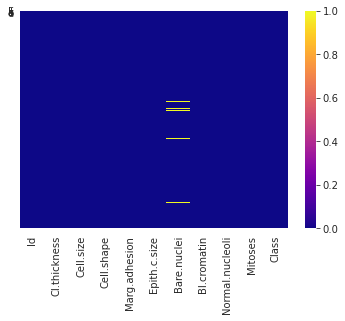

In [8]:
sns.heatmap(df.isnull() ,  yticklabels='False' , cmap = 'plasma')
print(df.isnull().any())

# After thinking what would be the best way to handle Missing data

**I concluded that filling the data with mean or mode it wouldbe great , however after taking a look of the Corre (cell-size ~ Cell.shape ~ Bare.nuclei)**

1. I would find the index of the missing Value
2. I would match other ID (people) Who cell-size ~ Cell.shape are equal to those missing Value
3. I will find the mode (My assumption is " if they share same size and shape they just have something in common ")

In [9]:
# the columns ' ID'  Does not give any important Data or correlation 
data = df.drop('Id' , axis = 1)

#Find Nan Value Index 
Nan_index = data[data.isna().any(axis=1)].index 
data[data.isna().any(axis=1)][0:5]

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
23,8,4,5,1,2,NaN,7,3,1,1
40,6,6,6,9,6,NaN,7,8,1,0
139,1,1,1,1,1,NaN,2,1,1,0
145,1,1,3,1,2,NaN,2,1,1,0
158,1,1,2,1,3,NaN,1,1,1,0


In [10]:
# Finding cell size Values
size= data[data.isna().any(axis=1)].iloc[:,1].to_list()

# Finding cell Shape Values
shape = data[data.isna().any(axis=1)].iloc[:,2].to_list()
print("size index =",size)
print("shape index =",shape)

size index = [4, 6, 1, 1, 1, 1, 1, 1, 1, 8, 1, 4, 6, 1, 1, 1]
shape index = [5, 6, 1, 3, 2, 1, 4, 1, 3, 8, 1, 3, 5, 1, 1, 1]


In [11]:
#crate a empty list to collect the mode of Bare.nucle
Mode_Bare_nuclei = []  #crate a empty list to collect the mode of Bare.nuclei
for i, j in zip(size,shape):  # collecting Data 
    Mod= data.loc[(data['Cell.size'] == i) & (data['Cell.shape'] == j)]['Bare.nuclei'].mode()[0]
    Mode_Bare_nuclei.append(Mod)

In [12]:
#replacing Data using index 
for i, j in zip(Nan_index,Mode_Bare_nuclei):
    data.loc[i,'Bare.nuclei'] = j

data.iloc[Nan_index][0:3] # Checking We have no more Nan_values

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
23,8,4,5,1,2,10.0,7,3,1,1
40,6,6,6,9,6,10.0,7,8,1,0
139,1,1,1,1,1,1.0,2,1,1,0


# OSEMN - E - Exploring / Visualizing our data
**Finding any Patterns and Trends**

(11.5, -0.5)

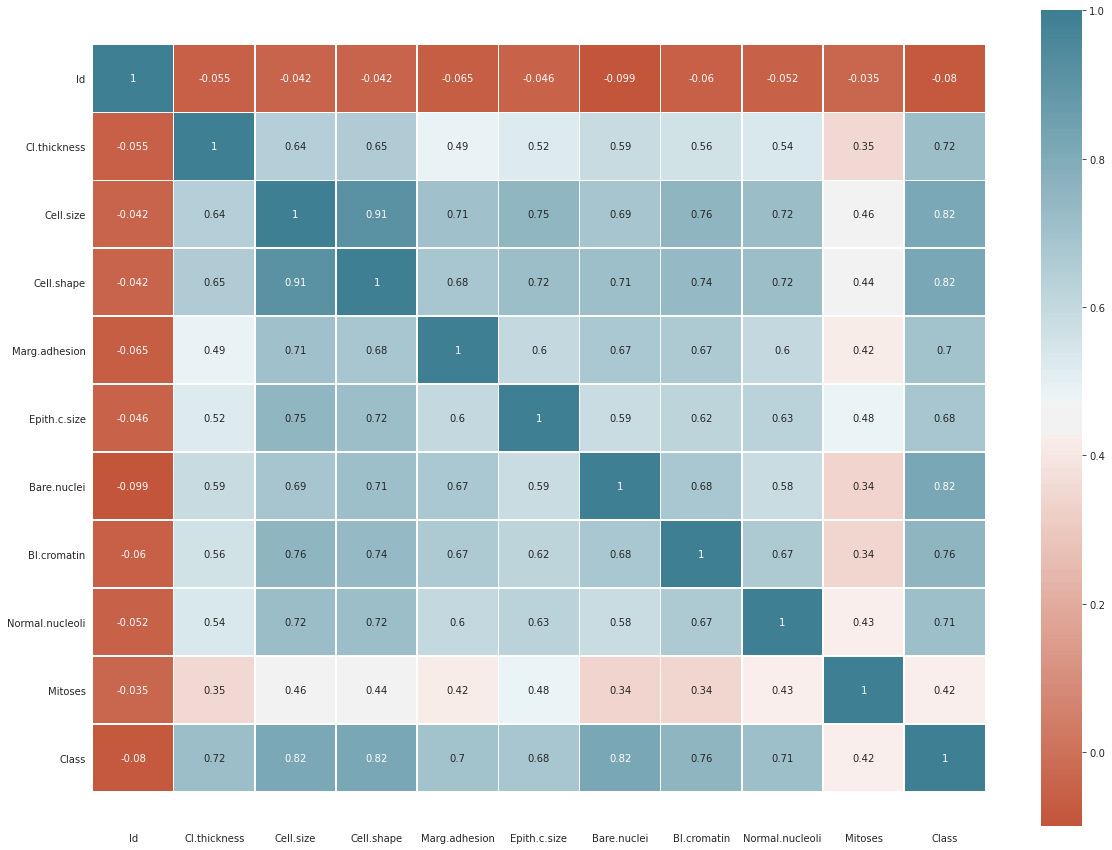

In [13]:
fig, ax1 = plt.subplots (figsize= (20,15))
ax = sns.heatmap(df.corr(),ax=ax1 , linecolor = 'white',linewidths=0.5, 
            annot = True,cmap=sns.diverging_palette(20, 220, n=200))
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

****As mentioned Before Cell.size ~ Cell.Shape ~ and Bare.Nuclei have strong relation 

In [14]:
df_re = df[['Cell.size','Cell.shape','Bare.nuclei','Bl.cromatin']]
df_re.iplot(kind = 'box',)
print("I consider these 4 variable important , therefore I was looking for any clue or trend ")

I consider these 4 variable important , therefore I was looking for any clue or trend 


Here we have a Visual description of mean and the Data Disstribution


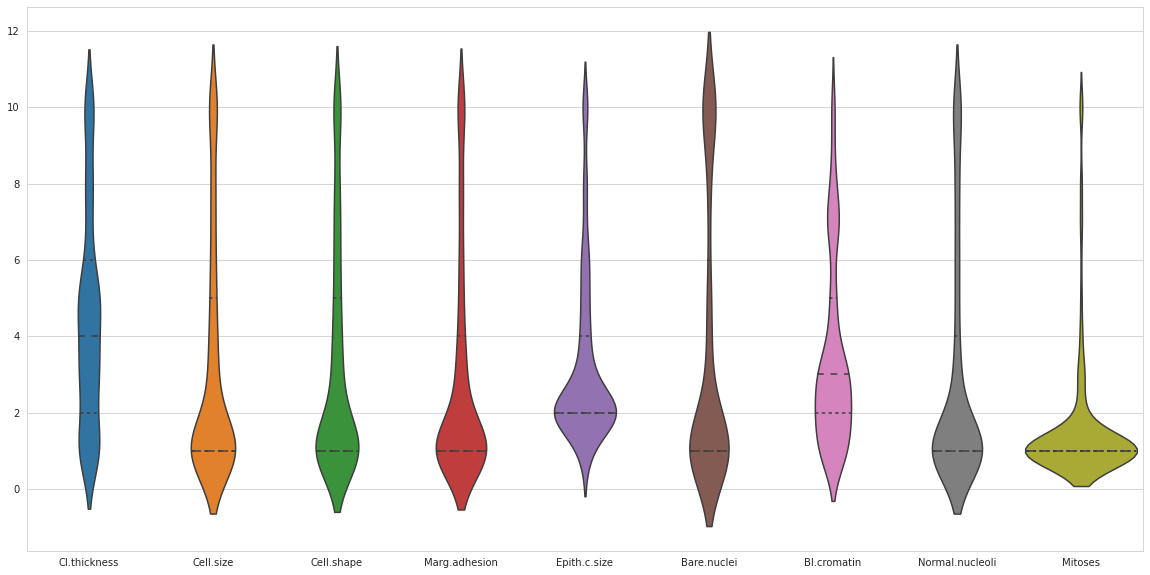

In [15]:
f, ax = plt.subplots(figsize=(20, 10))
sns.violinplot(data=df.drop(["Id","Class"],axis = 1), width = 0.9, inner = 'quartile')
print("Here we have a Visual description of mean and the Data Disstribution")

> It is evident that most of the mean are between 0 ~ 2 , this might be because it is from microscopic view

Relation Thickness, size, shape


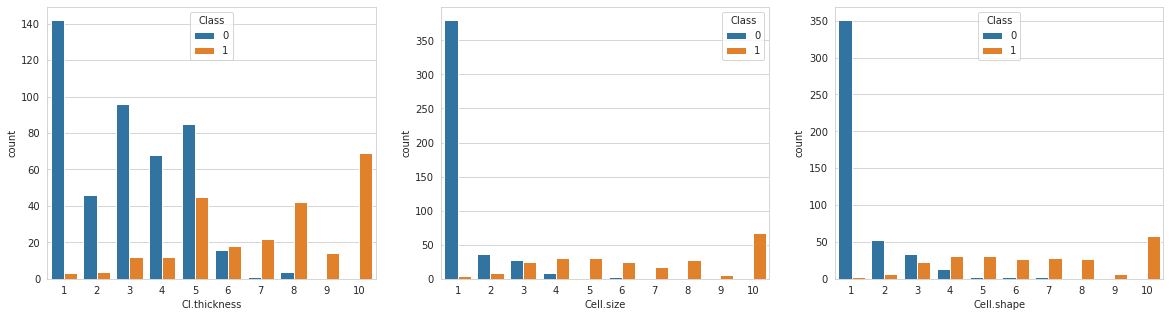

In [16]:
fig ,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (20,5))
sns.countplot(x ='Cl.thickness', data = df , hue='Class',  ax = ax1 )
sns.countplot(x ='Cell.size', data = df, hue='Class' , ax = ax2)
sns.countplot(x ='Cell.shape', data = df, hue='Class' , ax = ax3)
print('Relation Thickness, size, shape')

**Conclusion**
1. cl.Thickness:It is intersting to notice that having really thick plasma membrane is not guarantee of  benign or malignant tumor of course no one can guaratee it, but no matter the thickness (1 or 10) cases has been reported ,  and this study suggest  "The magnitude of the sensed stiffness can either promote or inhibit the migration of cancer cells out of the primary tumor into surrounding tissue" CHECK THIS :https://www.sciencedirect.com/science/article/abs/pii/S092777651930178X

2. Cl.Size: in this cases the data shows most 0 (benign  tumor) happened to have cell size = 1 , I would say the bigger the cel is the higher chances of having malignant tumor, here we have a possible reason " Cancer is a complex genetic disease that is caused by specific changes to the genes in one cell or group of cells. These changes disrupt normal cell function – specifically affecting how a cell grows and divides. CHECK THIS : https://www.technologynetworks.com/cancer-research/articles/cancer-cells-vs-normal-cells-307366

3. Cl.Shape Same cases of Cl.size


Relation Marg.Adhension, Epith C.Size , Bare.nuclei


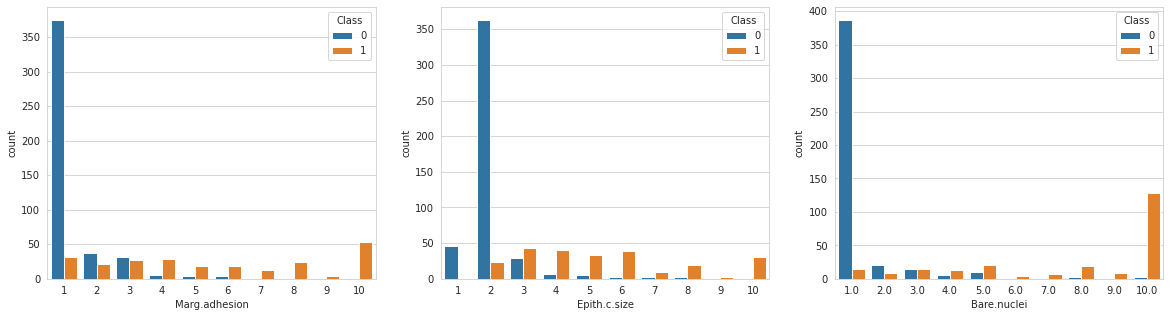

In [17]:
fig ,(ax4,ax5,ax6) = plt.subplots(1,3,figsize = (20,5))
sns.countplot(x ='Marg.adhesion', data = df, hue='Class' , ax = ax4 )
sns.countplot(x ='Epith.c.size', data = df, hue='Class' , ax = ax5 )
sns.countplot(x ='Bare.nuclei', data = df, hue='Class' , ax = ax6 )
print('Relation Marg.Adhension, Epith C.Size , Bare.nuclei')

**Conclusion**
1. Marg.Adhension : The greater the Marg.Adhension  values is the higher chances of having malignant tumor also increase , one reason could has been explained in this study "they affirmed that a group of cell adhesion molecules have been discovered with a wide spectrum of responsibilities, including recruiting, activating, elongating, and maintaining". CHECK HERE : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5564663/

2. Eptih size : The greater the Marge Adhension values is the higher chances of having malignant tumor also increase one of the reason coud be because  according to this study Most cancers arise in epithelia, the tissue type that lines all body cavities. The organization of epithelia enables them to act as a barrier and perform transport of molecules between body compartments. Crucial for their organization and function is a highly specialized network of cell which reveals an important contribution of polarity proteins to the initiation and progression of cancer" (please cheeck this link for the references  CHECK HERE : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3927155/

3. Bare.nuclei : one more time the bigger it is , the higher chances are .. one of the reason could be this "is one of the most common cancers occurring in the female population world-wide. and it seems that this cells gradually transform to form the cancer cells"  CHECK HERE : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3678677/

Relation Bl.cromatin Normal.nucleoli Mitoses


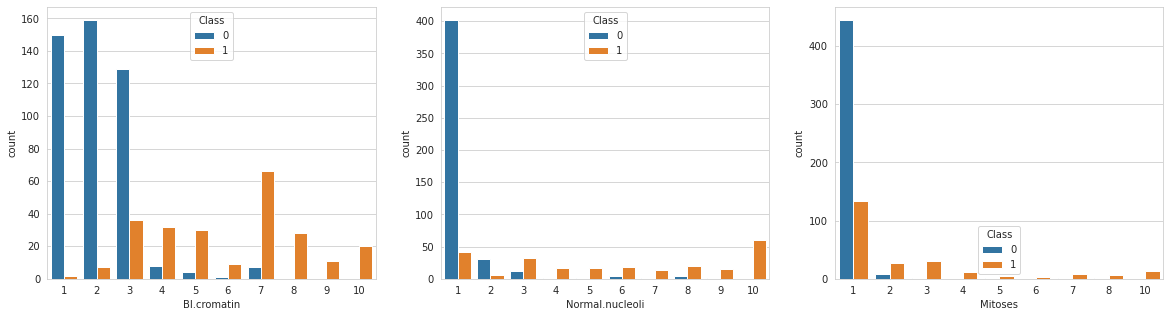

In [18]:
fig ,(ax7,ax8,ax9) = plt.subplots(1,3,figsize = (20,5))
sns.countplot(x ='Bl.cromatin', data = df, hue='Class' , ax = ax7 )
sns.countplot(x ='Normal.nucleoli', data = df, hue='Class' , ax = ax8 )
sns.countplot(x ='Mitoses', data = df, hue='Class' , ax = ax9 )
print('Relation Bl.cromatin', 'Normal.nucleoli' , 'Mitoses')

** Conclusion**
1. Bl.cromatin : In My understanding it is a mechanical and chemical signalling pathways , It this study (https://pubmed.ncbi.nlm.nih.gov/10546890/) they mentioned that tit is  measured from 1 to 10 (no idea what) the chances of having a maling tumor increase whrn it is above 3
2. nucleolus :  in this study  mentioned nucleolus as an opponent of cancer cells . In response to stress,some of this anti-cancer body friends participate in preventing impaired or transformed cells from spreading ( the more that you have The less chances of having malignant cancer " I like this cells)
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6267422/#:~:text=A%20nucleolus%20as%20an%20opponent%20of%20cancer%20cells%20via%20p53,or%20transformed%20cells%20from%20spreading.
3. Mitoses :  After reading I understood that mitosis it is a natural process of the cell (reproduce, divide , etc) but sometime there are some mistakes , I guess in this study they were measuring form a sample ( perfect cell Vs mutants) , if it is like that, I would say the More perfec cells you have , it is a good sight the yout body is copying and pasting new cel properly (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6004076/

# OSEMN  M 
Modeling our data will give us our predictive power as a wizard

**Applying Maching Learning**
1. k-nearest neighbors (KNN)
2. Logistical Regression

In [19]:
### applying KNN algorithm
from sklearn.neighbors import KNeighborsClassifier  # Algorithm
from sklearn.metrics import confusion_matrix,f1_score,classification_report # metrics
from sklearn.preprocessing import StandardScaler #scaler to 0-1
from sklearn.model_selection import train_test_split #train and split 

In [20]:
#StandarScale with new Dataframe
scaler = StandardScaler()
scaler_data = scaler.fit_transform(data.drop('Class',axis = 1)) 
data_p = pd.DataFrame(scaler_data , columns= data.columns[:-1])
data_p.head(4) # data_p = Data already Processed

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.698002,-0.179662,-0.611825,-0.343912
1,0.206936,0.283845,0.266875,0.768621,1.710106,1.764775,-0.179662,-0.284112,-0.343912
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.424360,-0.179662,-0.611825,-0.343912
3,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.122924,-0.179662,1.354454,-0.343912


In [21]:
#Splitting Data
X = data_p
y = data ['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**KNN**
1. The Challenge in KNN it is to find K# that fits the best , in order to do that I First evaluated K from a range (0-50) and stimate the Error ( This is my First KNN)
2. Then I will used the KNN that has less error (I read on the Web that this method it is called the Elbow Method)
3. If you Know any other way of Doing that Please let me know 

In [22]:
#Finding the n_neighbors that fits the best 
Error_Rate = []
for i in range (1,50):
    
    KNN_Error = KNeighborsClassifier(n_neighbors=i)
    KNN_Error.fit(X_train,y_train)
    pred_i = KNN_Error.predict(X_test)
    Error_Rate.append(np.mean(pred_i != y_test))

 K=3 is the most accurate rate because the error is closest to 0 


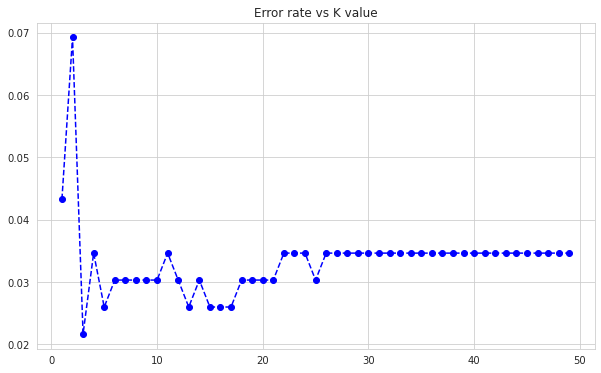

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50), Error_Rate , color = 'blue', linestyle = 'dashed', marker = 'o')
plt.title('Error rate vs K value')
print( " K=3 is the most accurate rate because the error is closest to 0 ")

In [24]:
#KNN Algorithm
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
#Predicting 
y_pred_KNN = KNN.predict(X_test)

### Conclusion 
KNN seems to be a good model to predict the breast Cancer because:
    1. the acurrance is 96 %
    2. The best K_neigh number is  3 

## Logistical Regression 

In [25]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train,y_train)
y_predi_LR = LR.predict(X_test)

print(confusion_matrix(y_test,y_predi_LR))
print(f1_score(y_test,y_predi_LR))
print(classification_report(y_test,y_predi_LR))

[[153   1]
 [  6  71]]
0.953020134228188
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       154
           1       0.99      0.92      0.95        77

    accuracy                           0.97       231
   macro avg       0.97      0.96      0.97       231
weighted avg       0.97      0.97      0.97       231



## KNN seems to have a better performance, however I would consider the fact that we have
1. 0=458 (benign) and 1=241 (malignant) and this might affect the model (bias) 
2. Cell shape, Cell Size and nucleolus are the most significante varaiable based on the correlation 
3. Between KKN and Logistical Regressiion , KNN predicts better with a f1 score of 96 % vs 95%